In [38]:
from plotly import graph_objects as go
import pandas as pd
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

def train_test_split(
    timestamps: np.ndarray, prices: np.ndarray, split_size: int = 0.8
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Split training and testing data
    Args:
        timestamps (np.ndarray): _description_
        prices (np.ndarray): _description_
        split_size (int):

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: Format tr
    """
    return (
        timestamps[:split_size],
        prices[:split_size],
        timestamps[split_size:],
        prices[split_size:],
    )


def naive_baseline(y_steps: np.ndarray) -> np.ndarray:
    """Create a naive baseline where the prediction is simply based on the last point

    Args:
        y_steps (np.ndarray): _description_

    Returns:
        np.ndarray: _description_
    """
    return y_steps[:-1]


In [14]:
df4 = pd.read_csv("/run/media/cc/840Evo/eth.usd.2018.csv", header=None, )
df4

,0,1,2,3
0,iehx-eth-usd,742.015308,0.296652,1.514765e+09
1,iehx-eth-usd,742.272462,0.000000,1.514765e+09
2,vehx-eth-usd,742.037945,0.000000,1.514765e+09
3,bfnx-eth-usd,736.500000,1.862383,1.514765e+09
4,stmp-eth-usd,743.500000,10.000000,1.514765e+09
...,...,...,...,...
96620388,iehx-eth-usd,130.807024,0.000000,1.546301e+09
96620389,prme-eth-usd,130.660000,6.543876,1.546301e+09
96620390,prme-eth-usd,130.660000,0.382600,1.546301e+09
96620391,base-eth-usd,130.660000,6.543876,1.546301e+09


In [15]:
df4.columns = ["pair", "price", "amount", "timestamp"]

In [23]:
df4["timestamp"] = pd.to_datetime(df4.timestamp, unit="s", utc=True)


In [33]:
df = df4[:][:1000]
df

,pair,price,amount,timestamp
0,iehx-eth-usd,742.015308,0.296652,2018-01-01 00:00:12+00:00
1,iehx-eth-usd,742.272462,0.000000,2018-01-01 00:00:00+00:00
2,vehx-eth-usd,742.037945,0.000000,2018-01-01 00:00:13+00:00
3,bfnx-eth-usd,736.500000,1.862383,2018-01-01 00:00:13+00:00
4,stmp-eth-usd,743.500000,10.000000,2018-01-01 00:00:01+00:00
...,...,...,...,...
995,iehx-eth-usd,739.388977,0.000000,2018-01-01 00:04:13+00:00
996,iehx-eth-usd,739.389243,0.000000,2018-01-01 00:04:14+00:00
997,iehx-eth-usd,739.389162,0.000000,2018-01-01 00:04:15+00:00
998,iehx-eth-usd,739.377827,0.000000,2018-01-01 00:04:16+00:00


In [32]:
# persistence algo (naive forcast
df.price.shift(-1)

0      742.272462
1      742.037945
2      736.500000
3      743.500000
4      742.340138
          ...    
995    739.389243
996    739.389162
997    739.377827
998    739.717304
999           NaN
Name: price, Length: 1000, dtype: float64

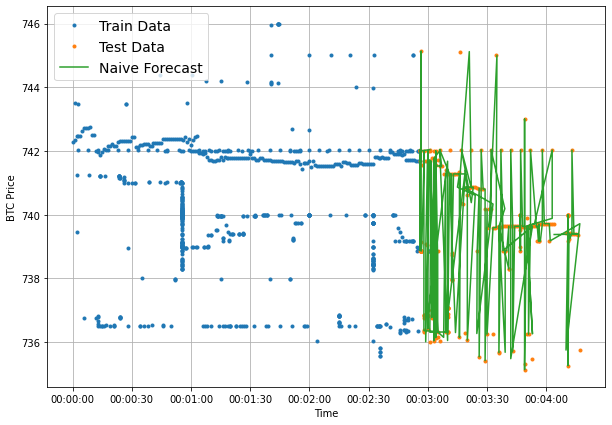

In [41]:
# fig = go.Figure([go.Scatter(x=df.timestamp, y=[df.price.shift[-1], df.price])])
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)
x_train, y_train = df.timestamp[:-200], df.price[:-200]
x_test, y_test = df.timestamp[800:], df.price[800:]
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label="Train Data")
plot_time_series(timesteps=x_test, values=y_test, label="Test Data")
plot_time_series(timesteps=x_test[1:], values=y_test[:-1],format="-", label="Naive Forecast")